C:\Users\HARSH\AppData\Local\Temp\ipykernel_15600\1873191406.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")


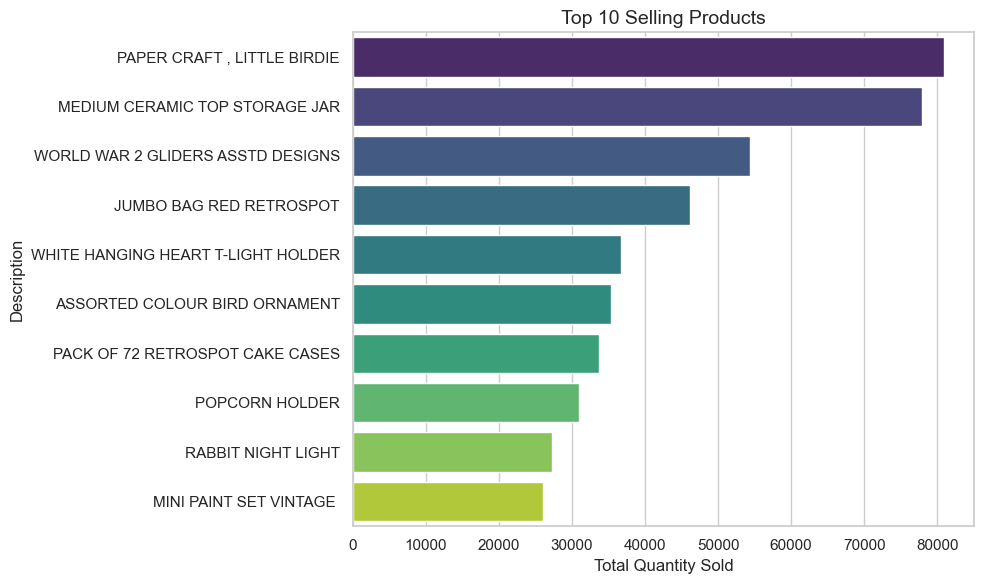

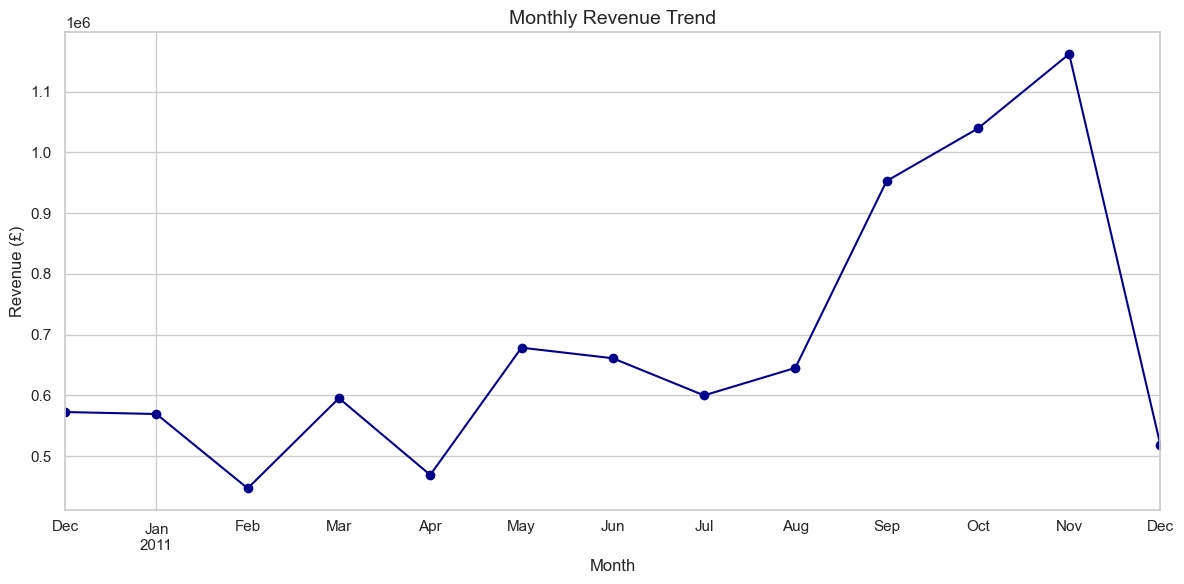

C:\Users\HARSH\AppData\Local\Temp\ipykernel_15600\1873191406.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=revenue_by_country.values, y=revenue_by_country.index, palette="magma")


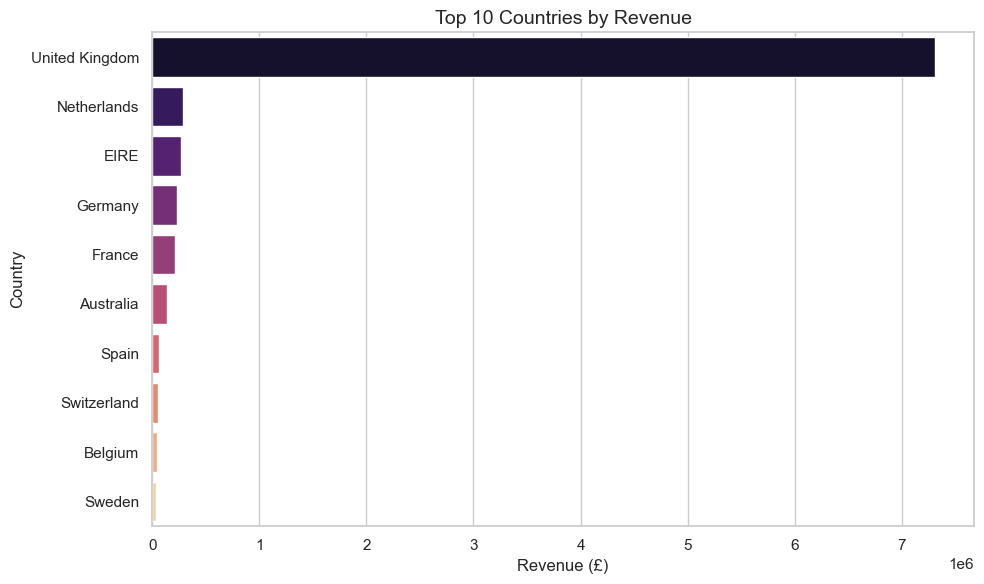

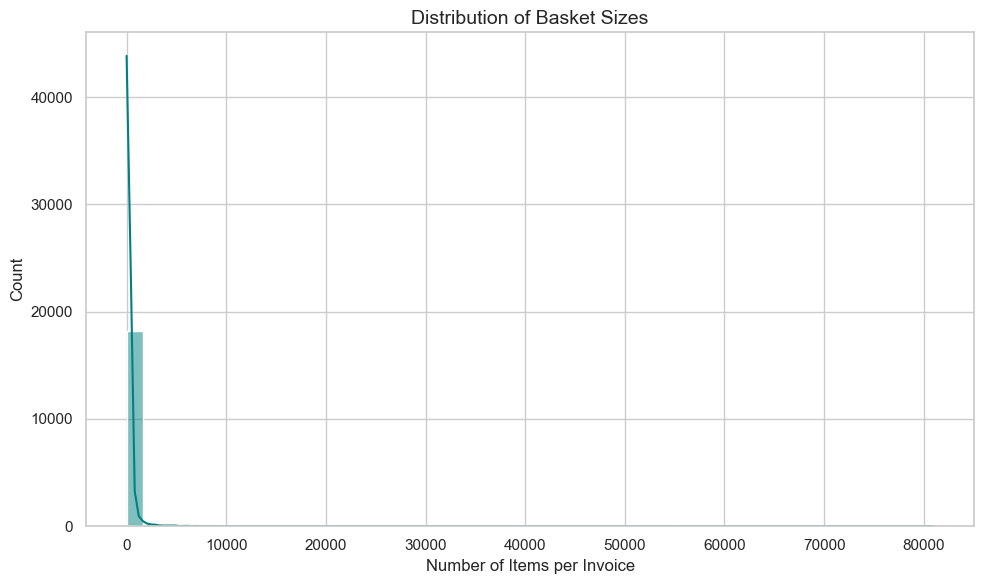

C:\Users\HARSH\AppData\Local\Temp\ipykernel_15600\1873191406.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_customers.index.astype(str), y=top_customers.values, palette="cubehelix")


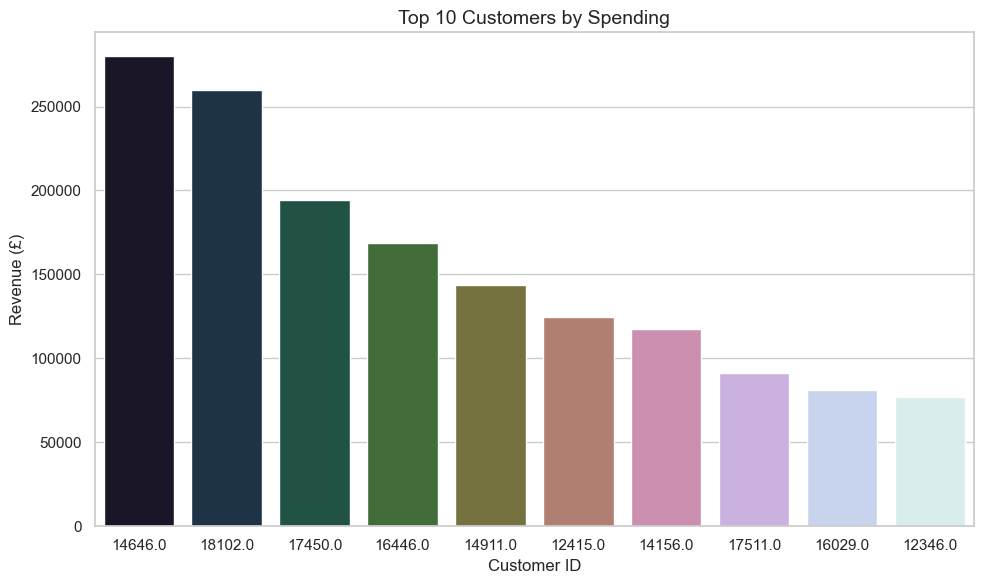

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned data
df = pd.read_csv(r"C:\Users\HARSH\OneDrive\Desktop\Retail_Internship_Project\data\cleaned\retail_cleaned.csv", parse_dates=["InvoiceDate"])

# Create output directory for images
import os
output_dir = r"C:\Users\HARSH\OneDrive\Desktop\Retail_Internship_Project\reports\figures"
os.makedirs(output_dir, exist_ok=True)

# Set seaborn theme
sns.set(style="whitegrid")

# 1. Top-Selling Products
top_products = df.groupby("Description")["Quantity"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")
plt.title("Top 10 Selling Products", fontsize=14)
plt.xlabel("Total Quantity Sold")
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "top_products.png"))
plt.show()

# 2. Monthly Revenue Trend
df["InvoiceMonth"] = df["InvoiceDate"].dt.to_period("M")
monthly_revenue = df.groupby("InvoiceMonth")["TotalPrice"].sum()
plt.figure(figsize=(12,6))
monthly_revenue.plot(marker='o', color='darkblue')
plt.title("Monthly Revenue Trend", fontsize=14)
plt.ylabel("Revenue (£)")
plt.xlabel("Month")
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "monthly_revenue.png"))
plt.show()

# 3. Revenue by Country
revenue_by_country = df.groupby("Country")["TotalPrice"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=revenue_by_country.values, y=revenue_by_country.index, palette="magma")
plt.title("Top 10 Countries by Revenue", fontsize=14)
plt.xlabel("Revenue (£)")
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "revenue_by_country.png"))
plt.show()

# 4. Basket Size Distribution
basket_size = df.groupby("InvoiceNo")["Quantity"].sum()
plt.figure(figsize=(10,6))
sns.histplot(basket_size, bins=50, kde=True, color="teal")
plt.title("Distribution of Basket Sizes", fontsize=14)
plt.xlabel("Number of Items per Invoice")
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "basket_size_dist.png"))
plt.show()

# 5. Top Customers by Spend
top_customers = df.groupby("CustomerID")["TotalPrice"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_customers.index.astype(str), y=top_customers.values, palette="cubehelix")
plt.title("Top 10 Customers by Spending", fontsize=14)
plt.ylabel("Revenue (£)")
plt.xlabel("Customer ID")
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "top_customers.png"))
plt.show()


C:\Users\HARSH\AppData\Local\Temp\ipykernel_15600\3272006974.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_revenue_products.values, y=top_revenue_products.index, palette="crest")


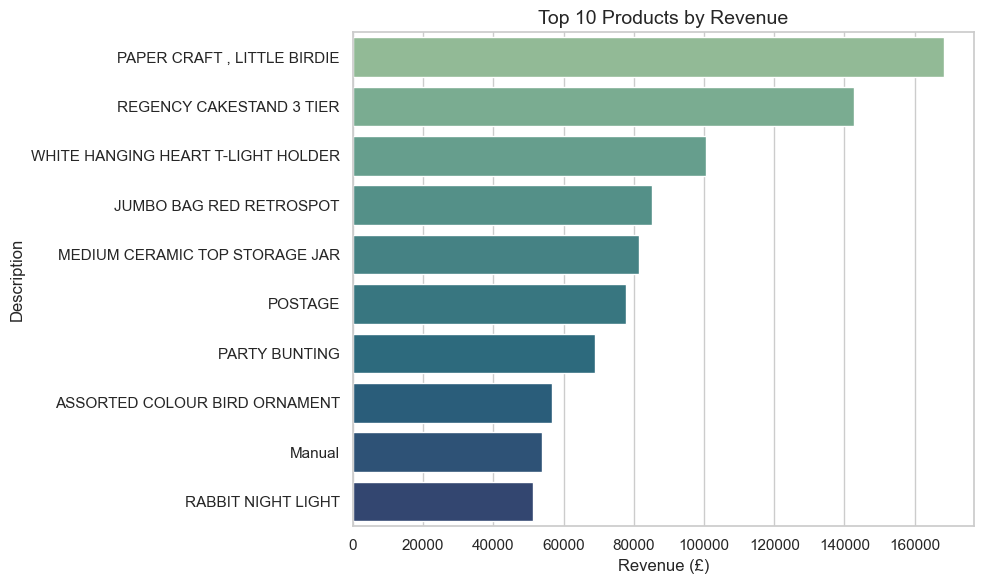

In [2]:
top_revenue_products = df.groupby("Description")["TotalPrice"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_revenue_products.values, y=top_revenue_products.index, palette="crest")
plt.title("Top 10 Products by Revenue", fontsize=14)
plt.xlabel("Revenue (£)")
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "top_revenue_products.png"))
plt.show()


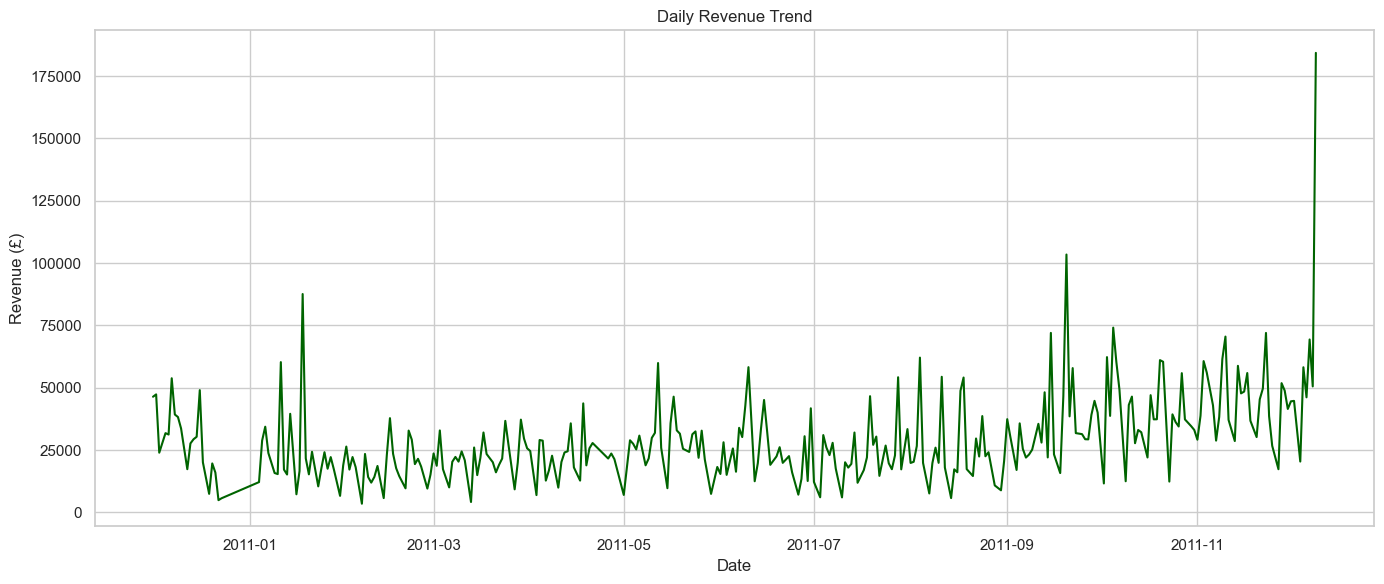

In [3]:
daily_revenue = df.groupby(df["InvoiceDate"].dt.date)["TotalPrice"].sum()
plt.figure(figsize=(14,6))
daily_revenue.plot(color='darkgreen')
plt.title("Daily Revenue Trend")
plt.ylabel("Revenue (£)")
plt.xlabel("Date")
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "daily_revenue.png"))
plt.show()


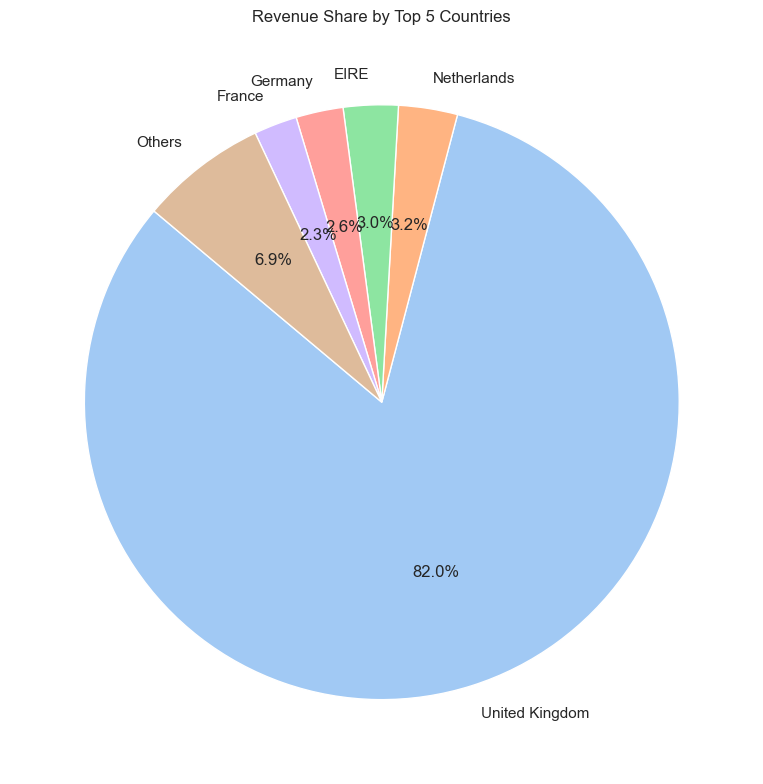

In [4]:
country_revenue = df.groupby("Country")["TotalPrice"].sum().sort_values(ascending=False)
top_countries = country_revenue.head(5)
others = country_revenue[5:].sum()
labels = list(top_countries.index) + ["Others"]
sizes = list(top_countries.values) + [others]

plt.figure(figsize=(8,8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title("Revenue Share by Top 5 Countries")
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "top5_country_pie.png"))
plt.show()


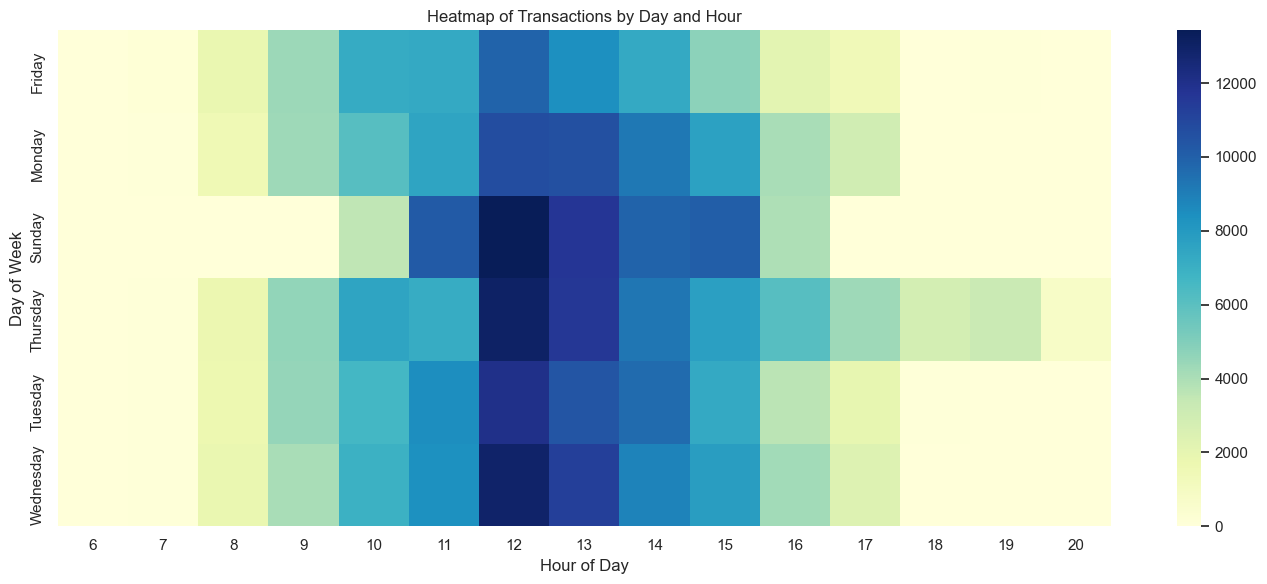

In [5]:
df["Hour"] = df["InvoiceDate"].dt.hour
df["Day"] = df["InvoiceDate"].dt.day_name()

pivot = df.pivot_table(index="Day", columns="Hour", values="InvoiceNo", aggfunc="count").fillna(0)
plt.figure(figsize=(14,6))
sns.heatmap(pivot, cmap="YlGnBu")
plt.title("Heatmap of Transactions by Day and Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "heatmap_hourly_sales.png"))
plt.show()
